Part 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.optimizers import Adam
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [2]:
# Independent and dependent features

iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)

In [3]:
# One-Hot Encoding and standardization

encoder = OneHotEncoder(sparse_output=False)
y_one_hot = encoder.fit_transform(y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
# Split the data set into train and test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_one_hot, test_size=0.2, random_state=42)

In [5]:
# Neural Network Model

def build_model(regularization=None, dropout_rate=None):
    model = Sequential()
    
    model.add(Dense(16, activation='tanh', input_shape=(X_train.shape[1],), 
                    kernel_regularizer=regularization))
    
    model.add(Dense(16, activation='tanh', kernel_regularizer=regularization))
    
    if dropout_rate:
        model.add(Dropout(dropout_rate))
    
    model.add(Dense(16, activation='relu', kernel_regularizer=regularization))
    
    model.add(Dense(3, activation='softmax'))
    
    return model

In [6]:
# Training function

def train_and_evaluate(model, title):
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    
    history = model.fit(X_train, y_train, epochs=200, batch_size=512, validation_data=(X_test, y_test), verbose=0)
    
    loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f"{title} -> Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}")
    
    return history

In [7]:
# Training model with different regularization techniques

print("Training without Regularization...")
history_no_reg = train_and_evaluate(build_model(), "No Regularization")

print("Training with L1 Regularization...")
history_l1 = train_and_evaluate(build_model(regularization=l1(0.01)), "L1 Regularization")

print("Training with L2 Regularization...")
history_l2 = train_and_evaluate(build_model(regularization=l2(0.01)), "L2 Regularization")

print("Training with Dropout Regularization...")
history_dropout = train_and_evaluate(build_model(dropout_rate=0.2), "Dropout Regularization")

Training without Regularization...


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


No Regularization -> Test Loss: 0.0957, Test Accuracy: 1.0000
Training with L1 Regularization...
L1 Regularization -> Test Loss: 1.0103, Test Accuracy: 0.9667
Training with L2 Regularization...
L2 Regularization -> Test Loss: 0.4588, Test Accuracy: 1.0000
Training with Dropout Regularization...
Dropout Regularization -> Test Loss: 0.0967, Test Accuracy: 1.0000


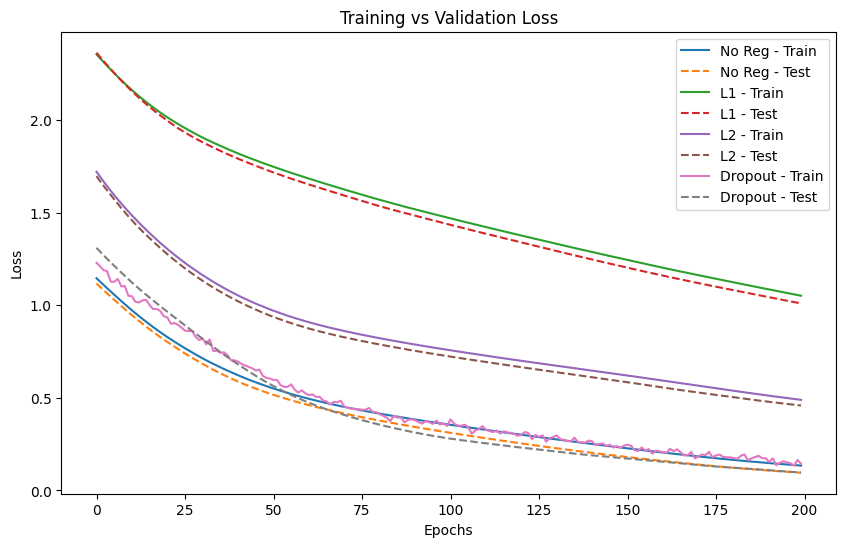

In [8]:
# plot training vs validation loss

def plot_loss(histories, labels):
    plt.figure(figsize=(10, 6))
    for history, label in zip(histories, labels):
        plt.plot(history.history['loss'], label=f"{label} - Train")
        plt.plot(history.history['val_loss'], linestyle="dashed", label=f"{label} - Test")
    
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training vs Validation Loss')
    plt.show()

plot_loss(
    [history_no_reg, history_l1, history_l2, history_dropout], 
    ["No Reg", "L1", "L2", "Dropout"]
)

Implementing Momentum, RMSProp, and Adam Optimizers from Scratch

In [9]:
def loss_function(m):
    return m**2 - 2*m + 1

def gradient(m):
    return 2 * m - 2

In [10]:
np.random.seed(42)
w = np.random.randn()

learning_rate = 0.1
beta_momentum = 0.9
beta_rmsprop = 0.9
beta1_adam = 0.9
beta2_adam = 0.999
epsilon = 1e-8

max_iterations = 1000

In [11]:
# Momentum Optimizer

def momentum_optimizer():
    m_t = 0
    w_momentum = w
    loss_values = []
    iterations = 0

    for t in range(1, max_iterations + 1):
        grad = gradient(w_momentum)
        m_t = beta_momentum * m_t + (1 - beta_momentum) * grad
        w_momentum -= learning_rate * m_t
        loss = loss_function(w_momentum)
        loss_values.append(loss)
        
        if t > 1 and abs(loss_values[-1] - loss_values[-2]) < 1e-6:
            iterations = t
            break

    return loss_values, iterations

In [12]:
# RMSProp Optimizer

def rmsprop_optimizer():
    v_t = 0
    w_rmsprop = w
    loss_values = []
    iterations = 0

    for t in range(1, max_iterations + 1):
        grad = gradient(w_rmsprop)
        v_t = beta_rmsprop * v_t + (1 - beta_rmsprop) * (grad ** 2)
        w_rmsprop -= (learning_rate / (np.sqrt(v_t) + epsilon)) * grad
        loss = loss_function(w_rmsprop)
        loss_values.append(loss)
        
        if t > 1 and abs(loss_values[-1] - loss_values[-2]) < 1e-6:
            iterations = t
            break

    return loss_values, iterations

In [13]:
# Adam Optimizer
def adam_optimizer():
    m_t = 0  
    v_t = 0  
    w_adam = w
    loss_values = []
    iterations = 0

    for t in range(1, max_iterations + 1):
        grad = gradient(w_adam)
        m_t = beta1_adam * m_t + (1 - beta1_adam) * grad
        v_t = beta2_adam * v_t + (1 - beta2_adam) * (grad ** 2)

        m_t_hat = m_t / (1 - beta1_adam ** t)
        v_t_hat = v_t / (1 - beta2_adam ** t)

        w_adam -= (learning_rate / (np.sqrt(v_t_hat) + epsilon)) * m_t_hat
        loss = loss_function(w_adam)
        loss_values.append(loss)

        if t > 1 and abs(loss_values[-1] - loss_values[-2]) < 1e-6:
            iterations = t
            break

    return loss_values, iterations

In [14]:
momentum_loss, momentum_iters = momentum_optimizer()
rmsprop_loss, rmsprop_iters = rmsprop_optimizer()
adam_loss, adam_iters = adam_optimizer()

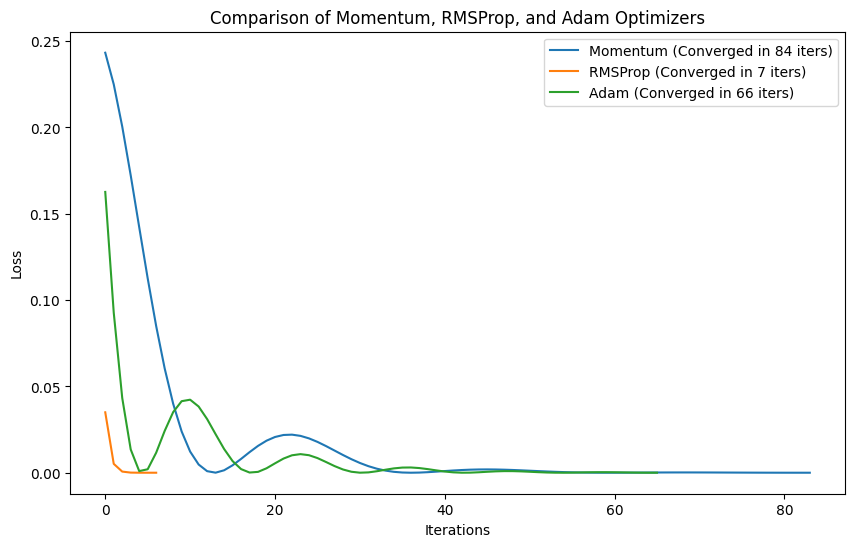

Momentum Optimizer converged in 84 iterations.
RMSProp Optimizer converged in 7 iterations.
Adam Optimizer converged in 66 iterations.


In [15]:
plt.figure(figsize=(10, 6))
plt.plot(momentum_loss, label=f'Momentum (Converged in {momentum_iters} iters)')
plt.plot(rmsprop_loss, label=f'RMSProp (Converged in {rmsprop_iters} iters)')
plt.plot(adam_loss, label=f'Adam (Converged in {adam_iters} iters)')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Comparison of Momentum, RMSProp, and Adam Optimizers')
plt.legend()
plt.show()

print(f"Momentum Optimizer converged in {momentum_iters} iterations.")
print(f"RMSProp Optimizer converged in {rmsprop_iters} iterations.")
print(f"Adam Optimizer converged in {adam_iters} iterations.")

In [16]:
# Best optimizer

best_optimizer = min(
    [(momentum_iters, "Momentum"), (rmsprop_iters, "RMSProp"), (adam_iters, "Adam")], 
    key=lambda x: x[0]
)
print(f"Best Optimizer: {best_optimizer[1]} (Converged in {best_optimizer[0]} iterations)")

Best Optimizer: RMSProp (Converged in 7 iterations)


Part 2

In [24]:
import tensorflow as tf
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras import backend as K
from tensorflow.python.profiler.model_analyzer import profile
from tensorflow.python.profiler.option_builder import ProfileOptionBuilder

In [18]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [19]:
# Normalize data
X_train = preprocess_input(X_train)
X_test = preprocess_input(X_test)

# one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [27]:
# calculate FLOPs
def get_flops(model):
    batch_size = 1
    input_shape = [batch_size] + list(model.input_shape[1:])
    inputs = [tf.TensorSpec(input_shape, tf.float32)]
    
    concrete_func = tf.function(model).get_concrete_function(*inputs)

    frozen_func = concrete_func.graph
    run_meta = tf.compat.v1.RunMetadata()
    opts = tf.compat.v1.profiler.ProfileOptionBuilder.float_operation()

    flops = tf.compat.v1.profiler.profile(graph=frozen_func, run_meta=run_meta, options=opts)
    
    return flops.total_float_ops

In [21]:
# Pre-Trained VGG16 Model (Feature Extractor)
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(32, 32, 3))

for layer in base_model.layers:
    layer.trainable = False

custom_model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation="relu"),
    Dropout(0.5),
    Dense(10, activation="softmax")
])

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [22]:
custom_model.compile(optimizer=Adam(), loss="categorical_crossentropy", metrics=["accuracy"])

start_time = time.time()
history = custom_model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test), verbose=1)
training_time = time.time() - start_time

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 116s 148ms/step - accuracy: 0.3923 - loss: 5.7011 - val_accuracy: 0.5836 - val_loss: 1.2113
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 120s 153ms/step - accuracy: 0.5416 - loss: 1.3310 - val_accuracy: 0.6241 - val_loss: 1.1047
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 121s 155ms/step - accuracy: 0.5854 - loss: 1.1879 - val_accuracy: 0.6404 - val_loss: 1.0620
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 124s 158ms/step - accuracy: 0.6135 - loss: 1.1146 - val_accuracy: 0.6449 - val_loss: 1.0369
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 125s 160ms/step - accuracy: 0.6303 - loss: 1.0680 - val_accuracy: 0.6543 - val_loss: 1.0231


In [28]:
# Evaluate the model
loss, accuracy = custom_model.evaluate(X_test, y_test, verbose=0)

# Calculate FLOPs
flops = get_flops(custom_model)

# Measure inference time
start_time = time.time()
custom_model.predict(X_test[:1000])  # Run inference on 1000 images
inference_time = (time.time() - start_time) / 1000  # Average time per image

Instructions for updating:
This API was designed for TensorFlow v1. See https://www.tensorflow.org/guide/migrate for instructions on how to migrate your code to TensorFlow v2.

=========================Options=============================
-max_depth                  10000
-min_bytes                  0
-min_peak_bytes             0
-min_residual_bytes         0
-min_output_bytes           0
-min_micros                 0
-min_accelerator_micros     0
-min_cpu_micros             0
-min_params                 0
-min_float_ops              1
-min_occurrence             0
-step                       -1
-order_by                   float_ops
-account_type_regexes       .*
-start_name_regexes         .*
-trim_name_regexes          
-show_name_regexes          .*
-hide_name_regexes          
-account_displayed_op_only  true
-select                     float_ops
-output                     stdout:

==================Model Analysis Report======================

Doc:
scope: The nodes in the model g


--- Model Performance ---
Test Accuracy: 0.6543
FLOPs: 627,062,076
Training Time: 606.39 seconds
Average Inference Time per Image: 0.002215 seconds


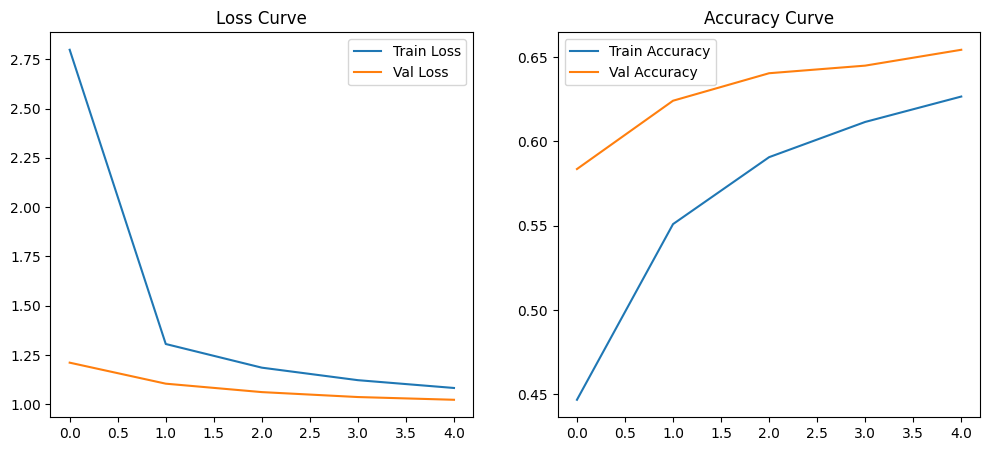

In [29]:
print("\n--- Model Performance ---")
print(f"Test Accuracy: {accuracy:.4f}")
print(f"FLOPs: {flops:,}")
print(f"Training Time: {training_time:.2f} seconds")
print(f"Average Inference Time per Image: {inference_time:.6f} seconds")

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].plot(history.history['loss'], label="Train Loss")
ax[0].plot(history.history['val_loss'], label="Val Loss")
ax[0].set_title("Loss Curve")
ax[0].legend()

ax[1].plot(history.history['accuracy'], label="Train Accuracy")
ax[1].plot(history.history['val_accuracy'], label="Val Accuracy")
ax[1].set_title("Accuracy Curve")
ax[1].legend()

plt.show()